<a href="https://colab.research.google.com/github/blazingbhavneek/scratch_ml/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
print(type(iris['data']))
print(iris['data'].shape)
print(type(iris['target']))
print(iris['target'].shape)

<class 'numpy.ndarray'>
(150, 4)
<class 'numpy.ndarray'>
(150,)


In [4]:
x = iris['data']
y = iris['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

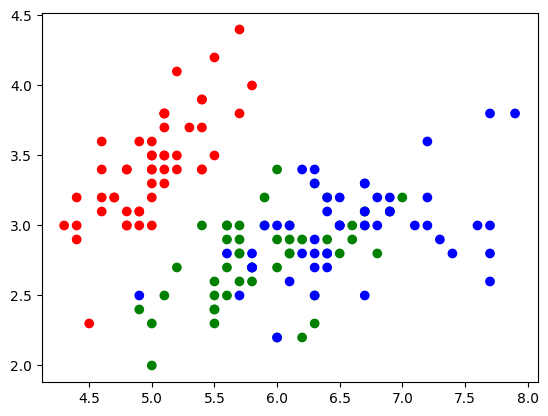

In [5]:
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue']))
plt.show()

In [6]:
class KNN:
  def __init__(self, k):
    self.k=k

  def fit(self, x, y):
    self.x=x
    self.y=y

  def predict(self, x):
    if x.shape[0]==1:
      return self.predict_help(x)

    predicted_labels = []

    for i in range(x.shape[0]):
      predicted_labels.append(self.predict_help(x[i]))
    return np.array(predicted_labels)

  def predict_help(self, x):
    dist = {}
    for i in range(self.x.shape[0]):
      dist[i]=self.euc_dist(self.x[i], x)
    dist = sorted(dist.items(), key=lambda x:x[1])
    # print(dist)
    labels = {}
    for i in range(self.k):
      ind = dist[i][0]
      # print(type(self.y))
      if ind in labels:
        labels[self.y[ind]]+=1
      else:
        labels[self.y[ind]]=1
    labels = sorted(labels.items())
    return labels[-1][0];


  def euc_dist(self, x, y):
    sum=0
    # print(x.shape, y.shape)
    for i in range(x.shape[0]):
      sum+= (x[i]-y[i])**2
    return np.sqrt(sum)

In [7]:
knn = KNN(3)

In [8]:
knn.fit(x_train, y_train)

In [9]:
y_hat = knn.predict(x_test)

In [10]:
print(y_test.shape)
print(y_hat.shape)

(30,)
(30,)


In [11]:
cnt = 0
acc = 0

for i in range(y_hat.shape[0]):
  cnt+=1
  if(y_hat[i]==y_test[i]):
    acc+=1

print("Accuracy: {:.2f}".format(acc/cnt*100))

Accuracy: 96.67


For k = 1, 5, and 10

In [12]:
knn = KNN(1)
knn.fit(x_train, y_train)
y_hat = knn.predict(x_test)
cnt = 0
acc = 0

for i in range(y_hat.shape[0]):
  cnt+=1
  if(y_hat[i]==y_test[i]):
    acc+=1

print("Accuracy: {:.2f}".format(acc/cnt*100))

Accuracy: 100.00


In [13]:
knn = KNN(5)
knn.fit(x_train, y_train)
y_hat = knn.predict(x_test)
cnt = 0
acc = 0

for i in range(y_hat.shape[0]):
  cnt+=1
  if(y_hat[i]==y_test[i]):
    acc+=1

print("Accuracy: {:.2f}".format(acc/cnt*100))

Accuracy: 96.67


In [14]:
knn = KNN(10)
knn.fit(x_train, y_train)
y_hat = knn.predict(x_test)
cnt = 0
acc = 0

for i in range(y_hat.shape[0]):
  cnt+=1
  if(y_hat[i]==y_test[i]):
    acc+=1

print("Accuracy: {:.2f}".format(acc/cnt*100))

Accuracy: 83.33
